## Transboundary Assessment

In [67]:
# Import needed libraries
import os
import csv
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
from pypalettes import load_cmap
import numpy as np
from shapely.geometry import Point
from matplotlib.patches import FancyArrowPatch
import scipy.io
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statistics import median, quantiles
from matplotlib.lines import Line2D

In [68]:
# Function to interpolate the colormap with cubic interpolation
def interpolate_cmap(cmap, num_interp_points):
    new_colors = cmap(np.linspace(0, 1, cmap.N))  # Ottieni i colori della colormap discreta
    new_cmap = LinearSegmentedColormap.from_list('my_interpolated_cmap', new_colors, N=num_interp_points)
    return new_cmap

In [69]:
# Reading ShapeFiles and projectig them in web Mercator

reservoirs = gpd.read_file('reservoir.shp')
basin = gpd.read_file('3Sbasin.shp')
rivernetwork = gpd.read_file('rivernetwork.shp')

reservoirs = reservoirs.to_crs(epsg=3857)
basin = basin.to_crs(epsg=3857)
rivernetwork = rivernetwork.to_crs(epsg=3857)


In [70]:
# Cap values for each indicator (the ones used to normalize the values of each objective between 0 and 1 during the optimization)
maxtotalpro = 10.627501095537942e+06 #hp production
maxfirm = 3.207057309002500e+04 #firm hp
maxsed = 30 #sediment loads

In [71]:
# Reading optimization results for flushing
filename = 'optimization_objectives_flush_final_1.txt'
#filename1 = 'optimization_variables_flush.txt'
data = np.loadtxt(filename)
#data1 = np.loadtxt(filename1)
all_data = data

fnew = all_data
#fvariables = all_data1

fnew_unique, indices = np.unique(fnew, axis=0, return_index=True)

# Usa gli stessi indici per ottenere le righe corrispondenti in fvariables
#fvariables_unique = fvariables[indices]




fnew_unique = all_data

# For the following plot, we locate sediment objective on the first column, hydro production on the second one, and firm hp on the third
a = fnew_unique[:, 0].copy()
b = fnew_unique[:, 1].copy()
fnew_unique[:, 0] = fnew_unique[:, 2]
fnew_unique[:, 1] = a
fnew_unique[:, 2] = b

fnew_unique_flush = fnew_unique
fnew_unique_flush[:, 0] = (1 - fnew_unique_flush[:, 0]) * maxsed;
fnew_unique_flush[:, 1] = (1 - fnew_unique_flush[:, 1]) * maxtotalpro*10**(-6) * 24 / 15
fnew_unique_flush[:, 2] = (1 - fnew_unique_flush[:, 2]) * maxfirm*24*10**(-3)

print(f"Pareto-efficient points:\n{fnew_unique}")


Pareto-efficient points:
[[ 16.04091     11.82643626 285.49095882]
 [ 15.79707     13.42222781 124.09233613]
 [ 15.51399     13.41892904 178.99228253]
 [ 15.46434     13.57310432  69.48718243]
 [ 15.45966     13.51393039  75.69322317]
 [ 15.54702     13.51284214 180.95269252]
 [ 15.99072     13.28136666 276.74954686]
 [ 15.49926     13.52569716  42.48401645]
 [ 15.50337     13.53168257 167.97103766]
 [ 15.85635     13.38284654  42.48401645]
 [ 15.52563     13.52219434  12.02877399]
 [ 15.53043     13.5186405   13.83447554]
 [ 15.52518     13.49718145  47.31538415]
 [ 15.56064     13.56745899  85.29284367]
 [ 15.53808     13.52636032 104.07875913]
 [ 15.53781     13.54972382 104.07568036]
 [ 15.51663     13.57233914 104.07721974]
 [ 15.95295     13.45837832 206.44417997]
 [ 15.57906     13.34536972 115.94666713]
 [ 15.52353     13.37732024 184.9974332 ]
 [ 15.5217      13.39694286 225.0115024 ]
 [ 15.99894     13.49662032 277.96258422]
 [ 15.73914     13.64878913 233.38423106]
 [ 15.749

In [72]:
# Reading optimization results for sluicing
filename = 'optimization_objectives_sluicing_final_1.txt'

data = np.loadtxt(filename)

all_data = data

fnew_unique = all_data
# For the following plot, we locate sediment objective on the first column, hydro production on the second one, and firm hp on the third
a = fnew_unique[:, 0].copy()
b = fnew_unique[:, 1].copy()
fnew_unique[:, 0] = fnew_unique[:, 2]
fnew_unique[:, 1] = a
fnew_unique[:, 2] = b

fnew_unique_sluicing = fnew_unique
fnew_unique_sluicing[:, 0] = (1 - fnew_unique_sluicing[:, 0]) * maxsed
fnew_unique_sluicing[:, 1] = (1 - fnew_unique_sluicing[:, 1]) * maxtotalpro*10**(-6) * 24 / 15
fnew_unique_sluicing[:, 2] = (1 - fnew_unique_sluicing[:, 2]) * maxfirm*24*10**(-3)
print(f"Pareto-efficient points:\n{fnew_unique}")

Pareto-efficient points:
[[  9.0132      14.7984637  126.3267571 ]
 [  9.02133     14.78984267 127.30734694]
 [  9.02616     14.78093257 122.59913024]
 [  8.48697     14.70052065 234.24474867]
 [ 10.50483     14.21332199 299.20382275]
 [  9.32919     14.59691526 199.89023765]
 [  9.77088     14.27866837 327.6024435 ]
 [ 10.46562     14.29638654 238.62045766]
 [ 10.35057     14.21301592 256.66823681]
 [ 10.38174     14.33819938 249.74638088]
 [ 10.1439      13.23491173 306.63906441]
 [ 10.02711     13.21829882 306.63906441]
 [ 10.33347     14.3106869  270.05628997]
 [  8.80194     14.83621258  99.99784285]
 [  8.79978     14.83063527 107.31993953]
 [  9.03921     14.78647588 103.33523496]
 [  9.97014     13.33015114 308.38088138]
 [  7.89333     14.67137579 325.09632064]
 [ 10.73184     14.25306034 308.22078508]
 [  9.94095     14.4135101  299.09991409]
 [  9.80727     14.41719997 324.96932117]
 [  7.89894     14.69115144 271.46482954]
 [  9.30474     14.32014113 316.82673094]
 [  9.132

In [73]:
# Reading optimization results for water rule curve
filename = 'optimization_objectives_waterrulecurve_1.txt'
data = np.loadtxt(filename)
all_data = data

fnew_unique = all_data
# For the following plot, we locate sediment objective on the first column, hydro production on the second one, and firm hp on the third
a = fnew_unique[:, 0].copy()
b = fnew_unique[:, 1].copy()
fnew_unique[:, 0] = fnew_unique[:, 2]
fnew_unique[:, 1] = a
fnew_unique[:, 2] = b

pareto_matrix = fnew_unique
'''
pareto_matrix[:, 0] = (1 - pareto_matrix[:, 0]) * maxsed-0.6
pareto_matrix[:, 1] = (1 - pareto_matrix[:, 1]) * maxtotalpro*10**(-6) * 24 / 15+4.8
pareto_matrix[:, 2] = (1 - pareto_matrix[:, 2]) * maxfirm*24*10**(-3)
'''
pareto_matrix[:, 0] = (1 - pareto_matrix[:, 0]) * maxsed
pareto_matrix[:, 1] = (1 - pareto_matrix[:, 1]) * maxtotalpro*10**(-6) * 24 / 15
pareto_matrix[:, 2] = (1 - pareto_matrix[:, 2]) * maxfirm*24*10**(-3)
print(f"Pareto-efficient points:\n{pareto_matrix}")

Pareto-efficient points:
[[  7.89546     15.92848164 342.53527203]
 [  7.88127     16.22503143 339.96141611]
 [  7.88574     16.25478843 334.45733608]
 [  7.85463     16.6000887  354.72337262]
 [  7.88043     16.42423331 351.07194545]
 [  7.88433     16.16492228 335.93591778]
 [  7.89264     16.08369417 338.64523979]
 [  7.89042     16.12729243 367.45333762]
 [  7.88973     16.1335499  338.71143346]
 [  7.89363     15.92989297 343.03557297]
 [  7.90719     15.90714162 322.98966883]
 [  7.89564     16.2971624  322.19611457]
 [  7.8957      16.04407484 339.37875794]
 [  7.90743     15.6228007  325.25872602]
 [  7.90161     16.1101864  309.48385253]
 [  7.9011      16.36296789 308.71492847]
 [  7.90518     16.17750524 307.94215594]
 [  7.89705     15.89336837 331.95352229]
 [  7.89723     15.83159284 330.448771  ]
 [  7.89012     16.52132616 311.68363728]
 [  7.90452     16.04012991 316.94680317]
 [  7.90509     15.92538691 316.84058543]
 [  7.90089     16.21219341 325.91527479]
 [  7.905

In [74]:
# Historical values of the three objectives
# Obtained simulating VICRes-CASCADE from 2008 to 2022 with the original water rule curve
historicalpro = 13.31259859521568
historicalfirm = 167.6655259864105
historicalsedload = 7.73458307692526

In [75]:
# Hydropower objectives for each country: Flushing
'''
This cell is reading the model results of all Pareto Optimal solution of flushing optimization, and it computes the same objective
of the optimization but considering country by country (total production for Vietnam, Cambodia, and Laos; Firm Hp for Vietnam, Cambodia, and Laos ...)
'''
selected_reservoirs = ['NamKong3', 'XepianXenam', 'Xekaman3', 'Xekaman1', 'Pleikrong', 'YaLi', 'Sesan4', 'LowerSesan2', 'BuonTuaSrah']
cambodian_reservoirs = ['LowerSesan2']
id_cambodian_reservoirs = [22]
laotian_reservoirs = ['NamKong3', 'XepianXenam','Xekaman3',]
id_laotian_reservoirs = [109, 11,7,8]
vietnamese_reservoirs = ['Pleikrong','YaLi','Sesan4','BuonTuaSrah']
id_vietnamese_reservoirs = [2,3,6,13]
number_of_days = 5479
spinning_period = 92
hydrofirm = [10000000 * 30 * 24 * 1000] * 308
hydrofirm_camb = [100000000 * 30 * 24 * 1000] * 308
hydrofirm_viet = [100000000 * 30 * 24 * 1000] * 308
hydrofirm_laos = [100000000 * 30 * 24 * 1000] * 308
totalproduction = [0.0]*308
totalproduction_camb = [0.0]*308
totalproduction_viet = [0.0]*308
totalproduction_laos = [0.0]*308
totalsed = [0]*308
annualsedavg = [0]*308
sedload = [0]*308
text_file = open('date.day','r')
lines = text_file.read().split('\n')
countrow = 0
violation = 0.0
waterdeficit = 0.0
peakds = 0.0
waterdeviation = 0.0
    
VICdata = [[0 for x in range(4)] for y in range(number_of_days)]
for line in lines:
    try:
        year,month,day,flows = filter(None,line.split(' '))
        VICdata[countrow][0] = float(year)
        VICdata[countrow][1] = float(month)
        VICdata[countrow][2] = float(day)
        VICdata[countrow][3] = float(flows)
    #         if (countrow>spinning_period):
    #             if (VICdata[countrow][3]>=floodthreshold):
    #                 violation+=1
    #             if (VICdata[countrow][3]>peakds):
    #                 peakds = VICdata[countrow][3]
        countrow+=1
    except:
        print("FINISH READING MODELED FILE ...")
text_file.close()

for j in range(33001,33309):
    
    folder_name = f"RoutingSetup3S{j}" 
    os.chdir(f"ResultsCompromizeFlushing/{folder_name}/Results")
    
    
    
    
    
    temphydrofirm = [0 for x in range(int(number_of_days/365)*12)]
    temphydrofirm_cambodian = [0 for x in range(int(number_of_days/365)*12)]
    temphydrofirm_laos = [0 for x in range(int(number_of_days/365)*12)]
    temphydrofirm_vietnam = [0 for x in range(int(number_of_days/365)*12)]
    countrow = 0
    occurences = [0 for x in range(int(number_of_days/365)*12)]
    # Read modeling results
    # - Calculate hydro power total production
    maximum_no_reservoirs = 9
    reservoir = [[0 for x in range(2)] for y in range(maximum_no_reservoirs)]
    #for i in range(maximum_no_reservoirs):
        #reservoirs[i][0] = int(lines[11].split(' ')[i])
    reservoir[0][0] = 7
    reservoir[1][0] = 11
    reservoir[2][0] = 8
    reservoir[3][0] = 109
    reservoir[4][0] = 2
    reservoir[5][0] = 3
    reservoir[6][0] = 6
    reservoir[7][0] = 22
    reservoir[8][0] = 13
    dischargers = [[0 for x in range(maximum_no_reservoirs)] for y in range(number_of_days)]
    for i in range(maximum_no_reservoirs):
        monthth = 0
        countrow = 0
        if (reservoir[i][0] in id_cambodian_reservoirs):
            with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
                lines = my_csv.read().split('\n')
                for line in lines:
                    try:
                        produce = 0
                        if (countrow>spinning_period):
                            list_so = list(filter(None,line.split()))
                            produce = float(list_so[6])
                            dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                            #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                        if (countrow>spinning_period):
                            if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                                if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                    monthth+=1
                                    occurences[monthth]=0
                                temphydrofirm_cambodian[monthth]+=produce
                                temphydrofirm[monthth]+=produce
                                occurences[monthth]+=1
                        totalproduction_camb[j-33001]+=produce
                        totalproduction[j-33001]+=produce
                        countrow+=1
                    except:
                        countrow = countrow
        if (reservoir[i][0] in id_laotian_reservoirs):
            with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
                lines = my_csv.read().split('\n')
                for line in lines:
                    try:
                        produce = 0
                        if (countrow>spinning_period):
                            list_so = list(filter(None,line.split()))
                            produce = float(list_so[6])
                            dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                            #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                        if (countrow>spinning_period):
                            if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                                if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                    monthth+=1
                                    occurences[monthth]=0
                                temphydrofirm_laos[monthth]+=produce
                                temphydrofirm[monthth]+=produce
                                occurences[monthth]+=1
                        totalproduction_laos[j-33001]+=produce
                        totalproduction[j-33001]+=produce
                        countrow+=1
                    except:
                        countrow = countrow
        if (reservoir[i][0] in id_vietnamese_reservoirs):
            with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
                lines = my_csv.read().split('\n')
                for line in lines:
                    try:
                        produce = 0
                        if (countrow>spinning_period):
                            list_so = list(filter(None,line.split()))
                            produce = float(list_so[6])
                            dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                            #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                        if (countrow>spinning_period):
                            if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                                if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                    monthth+=1
                                    occurences[monthth]=0
                                temphydrofirm_vietnam[monthth]+=produce
                                temphydrofirm[monthth]+=produce
                                occurences[monthth]+=1
                        totalproduction_viet[j-33001]+=produce
                        totalproduction[j-33001]+=produce
                        countrow+=1
                    except:
                        countrow = countrow
        # We now normalize to the range from 0 - 1
        # Unit: MWh ---> we maximize hydropower production or minimize 1 - its normalized value
        #waterdeviation = waterdeviation/maxreswl/countrow      # small number, but fine
    waterdeviation=0.3
    for i in range(monthth):                            # ignore the last month which is normally in the wet season
        if  (temphydrofirm[i]<hydrofirm[j-33001] and temphydrofirm[i]!=0):
            hydrofirm[j-33001]=temphydrofirm[i]
            occ=occurences[i]
    for i in range(monthth):                            # ignore the last month which is normally in the wet season
        if  (temphydrofirm_cambodian[i]<hydrofirm_camb[j-33001] and temphydrofirm_cambodian[i]!=0):
            hydrofirm_camb[j-33001]=temphydrofirm_cambodian[i]
            occ_camn=occurences[i]
    for i in range(monthth):                            # ignore the last month which is normally in the wet season
        if  (temphydrofirm_laos[i]<hydrofirm_laos[j-33001] and temphydrofirm_laos[i]!=0):
            hydrofirm_laos[j-33001]=temphydrofirm_laos[i]
            occ=occurences[i]
            
    for i in range(monthth):                            # ignore the last month which is normally in the wet season
        if  (temphydrofirm_vietnam[i]<hydrofirm_viet[j-33001] and temphydrofirm_vietnam[i]!=0):
            hydrofirm_viet[j-33001]=temphydrofirm_vietnam[i]
            occ=occurences[i]
        
    #hydrofirm=1-hydrofirm/30/totalinstallcapcity*1000          # normalize the value smallest montlhy value of the firm hydropower
    hydrofirm[j-33001] = 1 - hydrofirm[j-33001]/32070.5731
    hydrofirm_camb[j-33001] = 1 - hydrofirm_camb[j-33001]/32070.5731
    hydrofirm_laos[j-33001] = 1 - hydrofirm_laos[j-33001]/32070.5731
    hydrofirm_viet[j-33001] = 1 - hydrofirm_viet[j-33001]/32070.5731
    #totalproduction = 1 - totalproduction/totalinstallcapcity *1000/countrow
    totalproduction[j-33001] = 1 - totalproduction[j-33001]/10627501.095537942
    totalproduction_camb[j-33001] = 1 - totalproduction_camb[j-33001]/10627501.095537942
    totalproduction_laos[j-33001] = 1 - totalproduction_laos[j-33001]/10627501.095537942
    totalproduction_viet[j-33001] = 1 - totalproduction_viet[j-33001]/10627501.095537942
        
        
    count = 0
    pristinesed=30
    # file name with total sediment per year CSV
        
    file_name = "totsedyear.csv"

    with open(file_name, "r") as csv_file:
        csv_reader = csv.reader(csv_file)
            
        for row in csv_reader:
            try:
                sediment = float(row[0])
                totalsed[j-33001] += sediment
                count += 1
            except: 
                count=count
            # Compute the annual average and then normalize
    if count > 0:
        annualsedavg[j-33001] = totalsed[j-33001]/ count
        sedload[j-33001]=1-annualsedavg[j-33001]/pristinesed
    else:
        print("The sediment file is empty.")

    os.chdir('../../..')

'''
print((1-sedload)*maxsed)
print('Firm',(1-hydrofirm)* maxfirm*24*10**(-3))
print('Firm Laos',(1-hydrofirm_laos)* maxfirm*24*10**(-3))
print('Firm Vietnam',(1-hydrofirm_viet)* maxfirm*24*10**(-3))
print('Firm Cambodia',(1-hydrofirm_camb)* maxfirm*24*10**(-3))
print('Production',(1-totalproduction)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Laos',(1-totalproduction_laos)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Vietnam',(1-totalproduction_viet)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Cambodia',(1-totalproduction_camb)* maxtotalpro*10**(-6) * 24 / 15)
'''


FINISH READING MODELED FILE ...


"\nprint((1-sedload)*maxsed)\nprint('Firm',(1-hydrofirm)* maxfirm*24*10**(-3))\nprint('Firm Laos',(1-hydrofirm_laos)* maxfirm*24*10**(-3))\nprint('Firm Vietnam',(1-hydrofirm_viet)* maxfirm*24*10**(-3))\nprint('Firm Cambodia',(1-hydrofirm_camb)* maxfirm*24*10**(-3))\nprint('Production',(1-totalproduction)* maxtotalpro*10**(-6) * 24 / 15)\nprint('Production Laos',(1-totalproduction_laos)* maxtotalpro*10**(-6) * 24 / 15)\nprint('Production Vietnam',(1-totalproduction_viet)* maxtotalpro*10**(-6) * 24 / 15)\nprint('Production Cambodia',(1-totalproduction_camb)* maxtotalpro*10**(-6) * 24 / 15)\n"

In [76]:
# Hydropower objectives for each country: original
selected_reservoirs = ['NamKong3', 'XepianXenam', 'Xekaman3', 'Xekaman1', 'Pleikrong', 'YaLi', 'Sesan4', 'LowerSesan2', 'BuonTuaSrah']
cambodian_reservoirs = ['LowerSesan2']
id_cambodian_reservoirs = [22]
laotian_reservoirs = ['NamKong3', 'XepianXenam','Xekaman3',]
id_laotian_reservoirs = [109, 11,7,8]
vietnamese_reservoirs = ['Pleikrong','YaLi','Sesan4','BuonTuaSrah']
id_vietnamese_reservoirs = [2,3,6,13]
number_of_days = 5479
spinning_period = 92

os.chdir('OriginalIndicator/Results')
text_file = open('date.day','r')
lines = text_file.read().split('\n')
countrow = 0
violation = 0.0
waterdeficit = 0.0
peakds = 0.0
waterdeviation = 0.0
hydrofirm_original = 10000000 * 30*24*1000
hydrofirm_camb_original = 100000000 * 30 * 24 * 1000
hydrofirm_viet_original = 100000000 * 30 * 24 * 1000
hydrofirm_laos_original = 100000000 * 30 * 24 * 1000
VICdata = [[0 for x in range(4)] for y in range(number_of_days)]
for line in lines:
    try:
        year,month,day,flows = filter(None,line.split(' '))
        VICdata[countrow][0] = float(year)
        VICdata[countrow][1] = float(month)
        VICdata[countrow][2] = float(day)
        VICdata[countrow][3] = float(flows)
#         if (countrow>spinning_period):
#             if (VICdata[countrow][3]>=floodthreshold):
#                 violation+=1
#             if (VICdata[countrow][3]>peakds):
#                 peakds = VICdata[countrow][3]
        countrow+=1
    except:
        print("FINISH READING MODELED FILE ...")
text_file.close()
totalproduction_original = 0.0
totalproduction_camb_original = 0.0
totalproduction_viet_original = 0.0
totalproduction_laos_original = 0.0
temphydrofirm_original = [0 for x in range(int(number_of_days/365)*12)]
temphydrofirm_cambodian_original = [0 for x in range(int(number_of_days/365)*12)]
temphydrofirm_laos_original = [0 for x in range(int(number_of_days/365)*12)]
temphydrofirm_vietnam_original = [0 for x in range(int(number_of_days/365)*12)]
countrow = 0
occurences = [0 for x in range(int(number_of_days/365)*12)]
# Read modeling results
# - Calculate hydro power total production
maximum_no_reservoirs = 9
reservoir = [[0 for x in range(2)] for y in range(maximum_no_reservoirs)]
#for i in range(maximum_no_reservoirs):
    #reservoirs[i][0] = int(lines[11].split(' ')[i])
reservoir[0][0] = 7
reservoir[1][0] = 11
reservoir[2][0] = 8
reservoir[3][0] = 109
reservoir[4][0] = 2
reservoir[5][0] = 3
reservoir[6][0] = 6
reservoir[7][0] = 22
reservoir[8][0] = 13
dischargers = [[0 for x in range(maximum_no_reservoirs)] for y in range(number_of_days)]
for i in range(maximum_no_reservoirs):
    monthth = 0
    countrow = 0
    if (reservoir[i][0] in id_cambodian_reservoirs):
        with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
            lines = my_csv.read().split('\n')
            for line in lines:
                try:
                    produce = 0
                    if (countrow>spinning_period):
                        list_so = list(filter(None,line.split()))
                        produce = float(list_so[6])
                        dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                        #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                    if (countrow>spinning_period):
                        if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                            if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                monthth+=1
                                occurences[monthth]=0
                            temphydrofirm_cambodian_original[monthth]+=produce
                            temphydrofirm_original[monthth]+=produce
                            occurences[monthth]+=1
                    totalproduction_camb_original+=produce
                    totalproduction_original+=produce
                    countrow+=1
                except:
                    countrow = countrow
    if (reservoir[i][0] in id_laotian_reservoirs):
        with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
            lines = my_csv.read().split('\n')
            for line in lines:
                try:
                    produce = 0
                    if (countrow>spinning_period):
                        list_so = list(filter(None,line.split()))
                        produce = float(list_so[6])
                        dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                        #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                    if (countrow>spinning_period):
                        if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                            if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                monthth+=1
                                occurences[monthth]=0
                            temphydrofirm_laos_original[monthth]+=produce
                            temphydrofirm_original[monthth]+=produce
                            occurences[monthth]+=1
                    totalproduction_laos_original+=produce
                    totalproduction_original+=produce
                    countrow+=1
                except:
                    countrow = countrow
    if (reservoir[i][0] in id_vietnamese_reservoirs):
        with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
            lines = my_csv.read().split('\n')
            for line in lines:
                try:
                    produce = 0
                    if (countrow>spinning_period):
                        list_so = list(filter(None,line.split()))
                        produce = float(list_so[6])
                        dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                        #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                    if (countrow>spinning_period):
                        if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                            if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                monthth+=1
                                occurences[monthth]=0
                            temphydrofirm_vietnam_original[monthth]+=produce
                            temphydrofirm_original[monthth]+=produce
                            occurences[monthth]+=1
                    totalproduction_viet_original+=produce
                    totalproduction_original+=produce
                    countrow+=1
                except:
                    countrow = countrow
    # We now normalize to the range from 0 - 1
    # Unit: MWh ---> we maximize hydropower production or minimize 1 - its normalized value
    #waterdeviation = waterdeviation/maxreswl/countrow      # small number, but fine
waterdeviation=0.3
for i in range(monthth):                            # ignore the last month which is normally in the wet season
    if  (temphydrofirm_original[i]<hydrofirm_original and temphydrofirm_original[i]!=0):
        hydrofirm_original=temphydrofirm_original[i]
        occ=occurences[i]
for i in range(monthth):                            # ignore the last month which is normally in the wet season
    if  (temphydrofirm_cambodian_original[i]<hydrofirm_camb_original and temphydrofirm_cambodian_original[i]!=0):
        hydrofirm_camb_original=temphydrofirm_cambodian_original[i]
        occ_camn=occurences[i]


for i in range(monthth):                            # ignore the last month which is normally in the wet season
    if  (temphydrofirm_laos_original[i]<hydrofirm_laos_original and temphydrofirm_laos_original[i]!=0):
        hydrofirm_laos_original=temphydrofirm_laos_original[i]
        occ=occurences[i]
    
for i in range(monthth):                            # ignore the last month which is normally in the wet season
    if  (temphydrofirm_vietnam_original[i]<hydrofirm_viet_original and temphydrofirm_vietnam_original[i]!=0):
        hydrofirm_viet_original=temphydrofirm_vietnam_original[i]
        occ=occurences[i]
#hydrofirm=1-hydrofirm/30/totalinstallcapcity*1000          # normalize the value smallest montlhy value of the firm hydropower
hydrofirm_original = 1 - hydrofirm_original/32070.5731
hydrofirm_camb_original = 1 - hydrofirm_camb_original/32070.5731
hydrofirm_laos_original = 1 - hydrofirm_laos_original/32070.5731
hydrofirm_viet_original = 1 - hydrofirm_viet_original/32070.5731
#totalproduction = 1 - totalproduction/totalinstallcapcity *1000/countrow
totalproduction_original = 1 - totalproduction_original/10627501.095537942
totalproduction_camb_original = 1 - totalproduction_camb_original/10627501.095537942
totalproduction_laos_original = 1 - totalproduction_laos_original/10627501.095537942
totalproduction_viet_original = 1 - totalproduction_viet_original/10627501.095537942
totalsed = 0
count = 0
pristinesed=30
# file name with total sediment per year CSV
file_name = "totsedyear.csv"

with open(file_name, "r") as csv_file:
    csv_reader = csv.reader(csv_file)
    
    for row in csv_reader:
        try:
            sediment = float(row[0])
            totalsed += sediment
            count += 1
        except: 
            count=count
    # Compute the annual average and then normalize
if count > 0:
    annualsedavg = totalsed / count
    sedload=1-annualsedavg/pristinesed
else:
    print("The sediment file is empty.")

os.chdir('../..')
print((1-sedload)*maxsed)
print('Firm',(1-hydrofirm_original)* maxfirm*24*10**(-3))
print('Firm Laos',(1-hydrofirm_laos_original)* maxfirm*24*10**(-3))
print('Firm Vietnam',(1-hydrofirm_viet_original)* maxfirm*24*10**(-3))
print('Firm Cambodia',(1-hydrofirm_camb_original)* maxfirm*24*10**(-3))
print('Production',(1-totalproduction_original)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Laos',(1-totalproduction_laos_original)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Vietnam',(1-totalproduction_viet_original)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Cambodia',(1-totalproduction_camb_original)* maxtotalpro*10**(-6) * 24 / 15)


FINISH READING MODELED FILE ...
7.73458307692526
Firm 167.6655259864105
Firm Laos 23.47953933541711
Firm Vietnam 78.58576923219724
Firm Cambodia 1.3070751737534947
Production 13.31259859521568
Production Laos 6.866736534826072
Production Vietnam 6.064392911433383
Production Cambodia 0.38146914895647666


In [77]:
def is_pareto_dominant(point, others):
    
    for other in others:
        if not (point[0] >= other[0] and point[1] >= other[1] and point[2] >= other[2]):
            return False
        if (point[0] > other[0] or point[1] > other[1] or point[2] > other[2]):
            return True
    return False

In [78]:
# Isolate Dominant Solutions wrt historic condition
historical_conditions = np.column_stack((historicalsedload, historicalpro, historicalfirm))
def get_pareto_dominant_indices(points, historical_conditions):
    dominant_indices = []
    for idx, point in enumerate(points):
        if is_pareto_dominant(point, historical_conditions):
            dominant_indices.append(idx)
    return dominant_indices

fnew_unique_flush_dominant_indices = get_pareto_dominant_indices(fnew_unique_flush, historical_conditions)
fnew_unique_sluicing_dominant_indeces = get_pareto_dominant_indices(fnew_unique_sluicing, historical_conditions)


In [79]:
hydrofirm_dom = [hydrofirm[i] for i in fnew_unique_flush_dominant_indices]
hydrofirm_laos_dom = [hydrofirm_laos[i] for i in fnew_unique_flush_dominant_indices]
hydrofirm_camb_dom = [hydrofirm_camb[i] for i in fnew_unique_flush_dominant_indices]
hydrofirm_viet_dom = [hydrofirm_viet[i] for i in fnew_unique_flush_dominant_indices]

totalproduction_dom = [totalproduction[i] for i in fnew_unique_flush_dominant_indices]
totalproduction_laos_dom = [totalproduction_laos[i] for i in fnew_unique_flush_dominant_indices]
totalproduction_camb_dom = [totalproduction_camb[i] for i in fnew_unique_flush_dominant_indices]
totalproduction_viet_dom = [totalproduction_viet[i] for i in fnew_unique_flush_dominant_indices]

In [80]:


median_hydrofirm = median(hydrofirm_dom)
median_hydrofirm_laos = median(hydrofirm_laos_dom)
median_hydrofirm_camb = median(hydrofirm_camb_dom)
median_hydrofirm_viet = median(hydrofirm_viet_dom)


percentiles = quantiles(hydrofirm_dom, n=100)
perc25_hydrofirm = percentiles[24]  # 25th percentile
perc75_hydrofirm = percentiles[74]  # 75th percentile

percentiles = quantiles(hydrofirm_laos_dom, n=100)
perc25_hydrofirm_laos = percentiles[24]  # 25th percentile
perc75_hydrofirm_laos = percentiles[74]  # 75th percentile

percentiles = quantiles(hydrofirm_camb_dom, n=100)
perc25_hydrofirm_camb = percentiles[24]  # 25th percentile
perc75_hydrofirm_camb = percentiles[74]  # 75th percentile

percentiles = quantiles(hydrofirm_viet_dom, n=100)
perc25_hydrofirm_viet = percentiles[24]  # 25th percentile
perc75_hydrofirm_viet = percentiles[74]  # 75th percentile

median_totalproduction = median(totalproduction_dom)
median_totalproduction_laos = median(totalproduction_laos_dom)
median_totalproduction_camb = median(totalproduction_camb_dom)
median_totalproduction_viet = median(totalproduction_viet_dom)

percentiles = quantiles(totalproduction_dom, n=100)
perc25_totalproduction = percentiles[24]  # 25th percentile
perc75_totalproduction = percentiles[74] 

percentiles = quantiles(totalproduction_laos_dom, n=100)
perc25_totalproduction_laos = percentiles[24]  # 25th percentile
perc75_totalproduction_laos = percentiles[74] 

percentiles = quantiles(totalproduction_camb_dom, n=100)
perc25_totalproduction_camb = percentiles[24]  # 25th percentile
perc75_totalproduction_camb = percentiles[74] 

percentiles = quantiles(totalproduction_viet_dom, n=100)
perc25_totalproduction_viet = percentiles[24]  # 25th percentile
perc75_totalproduction_viet = percentiles[74] 


hydrofirm_original = (1-hydrofirm_original)* maxfirm*24*10**(-3)
hydrofirm_laos_original = (1-hydrofirm_laos_original)* maxfirm*24*10**(-3)
hydrofirm_viet_original = (1-hydrofirm_viet_original)* maxfirm*24*10**(-3)
hydrofirm_camb_original = (1-hydrofirm_camb_original)* maxfirm*24*10**(-3)
totalproduction_original = (1-totalproduction_original)* maxtotalpro*10**(-6) * 24 / 15
totalproduction_laos_original = (1-totalproduction_laos_original)* maxtotalpro*10**(-6) * 24 / 15
totalproduction_viet_original = (1-totalproduction_viet_original)* maxtotalpro*10**(-6) * 24 / 15
totalproduction_camb_original = (1-totalproduction_camb_original)* maxtotalpro*10**(-6) * 24 / 15


median_hydrofirm = (1-median_hydrofirm)* maxfirm*24*10**(-3)
median_hydrofirm_laos  = (1-median_hydrofirm_laos)* maxfirm*24*10**(-3)
median_hydrofirm_viet  = (1-median_hydrofirm_viet)* maxfirm*24*10**(-3)
median_hydrofirm_camb  = (1-median_hydrofirm_camb)* maxfirm*24*10**(-3)
median_totalproduction  = (1-median_totalproduction)* maxtotalpro*10**(-6) * 24 / 15
median_totalproduction_laos  = (1-median_totalproduction_laos)* maxtotalpro*10**(-6) * 24 / 15
median_totalproduction_viet = (1-median_totalproduction_viet)* maxtotalpro*10**(-6) * 24 / 15
median_totalproduction_camb  = (1-median_totalproduction_camb)* maxtotalpro*10**(-6) * 24 / 15

perc25_hydrofirm = (1-perc25_hydrofirm)* maxfirm*24*10**(-3)
perc25_hydrofirm_laos  = (1-perc25_hydrofirm_laos)* maxfirm*24*10**(-3)
perc25_hydrofirm_viet  = (1-perc25_hydrofirm_viet)* maxfirm*24*10**(-3)
perc25_hydrofirm_camb  = (1-perc25_hydrofirm_camb)* maxfirm*24*10**(-3)
perc25_totalproduction  = (1-perc25_totalproduction)* maxtotalpro*10**(-6) * 24 / 15
perc25_totalproduction_laos  = (1-perc25_totalproduction_laos)* maxtotalpro*10**(-6) * 24 / 15
perc25_totalproduction_viet = (1-perc25_totalproduction_viet)* maxtotalpro*10**(-6) * 24 / 15
perc25_totalproduction_camb  = (1-perc25_totalproduction_camb)* maxtotalpro*10**(-6) * 24 / 15

perc75_hydrofirm = (1-perc75_hydrofirm)* maxfirm*24*10**(-3)
perc75_hydrofirm_laos  = (1-perc75_hydrofirm_laos)* maxfirm*24*10**(-3)
perc75_hydrofirm_viet  = (1-perc75_hydrofirm_viet)* maxfirm*24*10**(-3)
perc75_hydrofirm_camb  = (1-perc75_hydrofirm_camb)* maxfirm*24*10**(-3)
perc75_totalproduction  = (1-perc75_totalproduction)* maxtotalpro*10**(-6) * 24 / 15
perc75_totalproduction_laos  = (1-perc75_totalproduction_laos)* maxtotalpro*10**(-6) * 24 / 15
perc75_totalproduction_viet = (1-perc75_totalproduction_viet)* maxtotalpro*10**(-6) * 24 / 15
perc75_totalproduction_camb  = (1-perc75_totalproduction_camb)* maxtotalpro*10**(-6) * 24 / 15

hydrofirm_diff_median_flush  = (median_hydrofirm -hydrofirm_original)/hydrofirm_original*100
hydrofirm_laos_diff_median_flush  = (median_hydrofirm_laos -hydrofirm_laos_original)/hydrofirm_laos_original*100
hydrofirm_cambodia_diff_median_flush  = (median_hydrofirm_camb - hydrofirm_camb_original)/hydrofirm_camb_original*100
hydrofirm_vietnam_diff_median_flush  = (median_hydrofirm_viet -hydrofirm_viet_original)/hydrofirm_viet_original*100

hydrofirm_diff_perc25_flush  = (perc25_hydrofirm -hydrofirm_original)/hydrofirm_original*100
hydrofirm_laos_diff_perc25_flush  = (perc25_hydrofirm_laos -hydrofirm_laos_original)/hydrofirm_laos_original*100
hydrofirm_cambodia_diff_perc25_flush  = (perc25_hydrofirm_camb - hydrofirm_camb_original)/hydrofirm_camb_original*100
hydrofirm_vietnam_diff_perc25_flush  = (perc25_hydrofirm_viet -hydrofirm_viet_original)/hydrofirm_viet_original*100

hydrofirm_diff_perc75_flush  = (perc75_hydrofirm -hydrofirm_original)/hydrofirm_original*100
hydrofirm_laos_diff_perc75_flush  = (perc75_hydrofirm_laos -hydrofirm_laos_original)/hydrofirm_laos_original*100
hydrofirm_cambodia_diff_perc75_flush  = (perc75_hydrofirm_camb - hydrofirm_camb_original)/hydrofirm_camb_original*100
hydrofirm_vietnam_diff_perc75_flush  = (perc75_hydrofirm_viet -hydrofirm_viet_original)/hydrofirm_viet_original*100

totalproduction_diff_median_flush  = (median_totalproduction-totalproduction_original)/totalproduction_original*100
totalproduction_laos_diff_median_flush  = (median_totalproduction_laos -totalproduction_laos_original)/totalproduction_laos_original*100
totalproduction_cambodia_diff_median_flush  = (median_totalproduction_camb -totalproduction_camb_original)/totalproduction_camb_original*100
totalproduction_vietnam_diff_median_flush  = (median_totalproduction_viet -totalproduction_viet_original)/totalproduction_viet_original*100

totalproduction_diff_perc25_flush  = (perc25_totalproduction-totalproduction_original)/totalproduction_original*100
totalproduction_laos_diff_perc25_flush = (perc25_totalproduction_laos -totalproduction_laos_original)/totalproduction_laos_original*100
totalproduction_cambodia_diff_perc25_flush  = (perc25_totalproduction_camb -totalproduction_camb_original)/totalproduction_camb_original*100
totalproduction_vietnam_diff_perc25_flush  = (perc25_totalproduction_viet -totalproduction_viet_original)/totalproduction_viet_original*100

totalproduction_diff_perc75_flush  = (perc75_totalproduction-totalproduction_original)/totalproduction_original*100
totalproduction_laos_diff_perc75_flush = (perc75_totalproduction_laos -totalproduction_laos_original)/totalproduction_laos_original*100
totalproduction_cambodia_diff_perc75_flush  = (perc75_totalproduction_camb -totalproduction_camb_original)/totalproduction_camb_original*100
totalproduction_vietnam_diff_perc75_flush  = (perc75_totalproduction_viet -totalproduction_viet_original)/totalproduction_viet_original*100

'''
print(hydrofirm_diff )
print(hydrofirm_laos_diff )
print(hydrofirm_cambodia_diff )
print(hydrofirm_vietnam_diff )

print(totalproduction_diff )
print(totalproduction_laos_diff )
print(totalproduction_cambodia_diff )
print(totalproduction_vietnam_diff )
'''

'\nprint(hydrofirm_diff )\nprint(hydrofirm_laos_diff )\nprint(hydrofirm_cambodia_diff )\nprint(hydrofirm_vietnam_diff )\n\nprint(totalproduction_diff )\nprint(totalproduction_laos_diff )\nprint(totalproduction_cambodia_diff )\nprint(totalproduction_vietnam_diff )\n'

In [81]:
# Function to intersect two shapefiles and save the result
def interseca_shapefile(file1, file2, output_file):
    # Leggi i file shapefile
    gdf1 = gpd.read_file(file1)
    gdf2 = gpd.read_file(file2)

  
    if gdf1.crs != gdf2.crs:
        gdf2 = gdf2.to_crs(gdf1.crs)

    
    intersezione = gpd.overlay(gdf1, gdf2, how='intersection')

    
    intersezione.to_file(output_file)

    return intersezione

# File di input
kh_file = "cambodiashapefile.shp"
three_sbasin_file = "3Sbasin.shp"
la_file = "laosshapefile.shp"
vn_file = "vietnamshapefile.shp"

# File di output
kh_3s_file = "kh_3S.shp"
la_3s_file = "la_3S.shp"
vn_3s_file = "vn_3S.shp"

# Esegui le intersezioni
kh_3s = interseca_shapefile(kh_file, three_sbasin_file, kh_3s_file)
la_3s = interseca_shapefile(la_file, three_sbasin_file, la_3s_file)
vn_3s = interseca_shapefile(vn_file, three_sbasin_file, vn_3s_file)

la_3s= la_3s.to_crs(epsg=3857)
vn_3s= vn_3s.to_crs(epsg=3857)
kh_3s= kh_3s.to_crs(epsg=3857)

/Users/br1/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Phd/VICRes3S/ResultsPaper3S/GraficiPython/Figure6/FigureTrans/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 4041128330 of field HYBAS_ID of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/Users/br1/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Phd/VICRes3S/ResultsPaper3S/GraficiPython/Figure6/FigureTrans/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 4041144860 of field NEXT_DOWN of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/Users/br1/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Phd/VICRes3S/ResultsPaper3S/GraficiPython/Figure6/FigureTrans/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 4040017020 of field NEXT_SINK of feature 0 not successfully written. Possibly due to too larger number with respect to field width


In [82]:
# Hydropower objectives for each country:Slushing
''' 
This cell is reading the model results of all Pareto Optimal solution of flushing optimization, and it computes the same objective
of the optimization but considering country by country (total production for Vietnam, Cambodia, and Laos; Firm Hp for Vietnam, Cambodia, and Laos ...)
'''
selected_reservoirs = ['NamKong3', 'XepianXenam', 'Xekaman3', 'Xekaman1', 'Pleikrong', 'YaLi', 'Sesan4', 'LowerSesan2', 'BuonTuaSrah']
cambodian_reservoirs = ['LowerSesan2']
id_cambodian_reservoirs = [22]
laotian_reservoirs = ['NamKong3', 'XepianXenam','Xekaman3',]
id_laotian_reservoirs = [109, 11,7,8]
vietnamese_reservoirs = ['Pleikrong','YaLi','Sesan4','BuonTuaSrah']
id_vietnamese_reservoirs = [2,3,6,13]
number_of_days = 5479
spinning_period = 92
hydrofirm = [10000000 * 30 * 24 * 1000] * 226
hydrofirm_camb = [100000000 * 30 * 24 * 1000] * 226
hydrofirm_viet = [100000000 * 30 * 24 * 1000] * 226
hydrofirm_laos = [100000000 * 30 * 24 * 1000] * 226
totalproduction = [0.0]*226
totalproduction_camb = [0.0]*226
totalproduction_viet = [0.0]*226
totalproduction_laos = [0.0]*226
totalsed = [0]*226
annualsedavg = [0]*226
sedload = [0]*226
text_file = open('date.day','r')
lines = text_file.read().split('\n')
countrow = 0
violation = 0.0
waterdeficit = 0.0
peakds = 0.0
waterdeviation = 0.0
    
VICdata = [[0 for x in range(4)] for y in range(number_of_days)]
for line in lines:
    try:
        year,month,day,flows = filter(None,line.split(' '))
        VICdata[countrow][0] = float(year)
        VICdata[countrow][1] = float(month)
        VICdata[countrow][2] = float(day)
        VICdata[countrow][3] = float(flows)
    #         if (countrow>spinning_period):
    #             if (VICdata[countrow][3]>=floodthreshold):
    #                 violation+=1
    #             if (VICdata[countrow][3]>peakds):
    #                 peakds = VICdata[countrow][3]
        countrow+=1
    except:
        print("FINISH READING MODELED FILE ...")
text_file.close()

for j in range(33001,33227):
    
    folder_name = f"RoutingSetup3S{j}" 
    os.chdir(f"ResultsCompromizeSluicing/{folder_name}/Results")
    
    
    
    
    
    temphydrofirm = [0 for x in range(int(number_of_days/365)*12)]
    temphydrofirm_cambodian = [0 for x in range(int(number_of_days/365)*12)]
    temphydrofirm_laos = [0 for x in range(int(number_of_days/365)*12)]
    temphydrofirm_vietnam = [0 for x in range(int(number_of_days/365)*12)]
    countrow = 0
    occurences = [0 for x in range(int(number_of_days/365)*12)]
    # Read modeling results
    # - Calculate hydro power total production
    maximum_no_reservoirs = 9
    reservoir = [[0 for x in range(2)] for y in range(maximum_no_reservoirs)]
    #for i in range(maximum_no_reservoirs):
        #reservoirs[i][0] = int(lines[11].split(' ')[i])
    reservoir[0][0] = 7
    reservoir[1][0] = 11
    reservoir[2][0] = 8
    reservoir[3][0] = 109
    reservoir[4][0] = 2
    reservoir[5][0] = 3
    reservoir[6][0] = 6
    reservoir[7][0] = 22
    reservoir[8][0] = 13
    dischargers = [[0 for x in range(maximum_no_reservoirs)] for y in range(number_of_days)]
    for i in range(maximum_no_reservoirs):
        monthth = 0
        countrow = 0
        if (reservoir[i][0] in id_cambodian_reservoirs):
            with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
                lines = my_csv.read().split('\n')
                for line in lines:
                    try:
                        produce = 0
                        if (countrow>spinning_period):
                            list_so = list(filter(None,line.split()))
                            produce = float(list_so[6])
                            dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                            #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                        if (countrow>spinning_period):
                            if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                                if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                    monthth+=1
                                    occurences[monthth]=0
                                temphydrofirm_cambodian[monthth]+=produce
                                temphydrofirm[monthth]+=produce
                                occurences[monthth]+=1
                        totalproduction_camb[j-33001]+=produce
                        totalproduction[j-33001]+=produce
                        countrow+=1
                    except:
                        countrow = countrow
        if (reservoir[i][0] in id_laotian_reservoirs):
            with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
                lines = my_csv.read().split('\n')
                for line in lines:
                    try:
                        produce = 0
                        if (countrow>spinning_period):
                            list_so = list(filter(None,line.split()))
                            produce = float(list_so[6])
                            dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                            #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                        if (countrow>spinning_period):
                            if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                                if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                    monthth+=1
                                    occurences[monthth]=0
                                temphydrofirm_laos[monthth]+=produce
                                temphydrofirm[monthth]+=produce
                                occurences[monthth]+=1
                        totalproduction_laos[j-33001]+=produce
                        totalproduction[j-33001]+=produce
                        countrow+=1
                    except:
                        countrow = countrow
        if (reservoir[i][0] in id_vietnamese_reservoirs):
            with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
                lines = my_csv.read().split('\n')
                for line in lines:
                    try:
                        produce = 0
                        if (countrow>spinning_period):
                            list_so = list(filter(None,line.split()))
                            produce = float(list_so[6])
                            dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                            #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                        if (countrow>spinning_period):
                            if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                                if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                    monthth+=1
                                    occurences[monthth]=0
                                temphydrofirm_vietnam[monthth]+=produce
                                temphydrofirm[monthth]+=produce
                                occurences[monthth]+=1
                        totalproduction_viet[j-33001]+=produce
                        totalproduction[j-33001]+=produce
                        countrow+=1
                    except:
                        countrow = countrow
        # We now normalize to the range from 0 - 1
        # Unit: MWh ---> we maximize hydropower production or minimize 1 - its normalized value
        #waterdeviation = waterdeviation/maxreswl/countrow      # small number, but fine
    waterdeviation=0.3
    for i in range(monthth):                            # ignore the last month which is normally in the wet season
        if  (temphydrofirm[i]<hydrofirm[j-33001] and temphydrofirm[i]!=0):
            hydrofirm[j-33001]=temphydrofirm[i]
            occ=occurences[i]
    for i in range(monthth):                            # ignore the last month which is normally in the wet season
        if  (temphydrofirm_cambodian[i]<hydrofirm_camb[j-33001] and temphydrofirm_cambodian[i]!=0):
            hydrofirm_camb[j-33001]=temphydrofirm_cambodian[i]
            occ_camn=occurences[i]
    for i in range(monthth):                            # ignore the last month which is normally in the wet season
        if  (temphydrofirm_laos[i]<hydrofirm_laos[j-33001] and temphydrofirm_laos[i]!=0):
            hydrofirm_laos[j-33001]=temphydrofirm_laos[i]
            occ=occurences[i]
            
    for i in range(monthth):                            # ignore the last month which is normally in the wet season
        if  (temphydrofirm_vietnam[i]<hydrofirm_viet[j-33001] and temphydrofirm_vietnam[i]!=0):
            hydrofirm_viet[j-33001]=temphydrofirm_vietnam[i]
            occ=occurences[i]
        
    #hydrofirm=1-hydrofirm/30/totalinstallcapcity*1000          # normalize the value smallest montlhy value of the firm hydropower
    hydrofirm[j-33001] = 1 - hydrofirm[j-33001]/32070.5731
    hydrofirm_camb[j-33001] = 1 - hydrofirm_camb[j-33001]/32070.5731
    hydrofirm_laos[j-33001] = 1 - hydrofirm_laos[j-33001]/32070.5731
    hydrofirm_viet[j-33001] = 1 - hydrofirm_viet[j-33001]/32070.5731
    #totalproduction = 1 - totalproduction/totalinstallcapcity *1000/countrow
    totalproduction[j-33001] = 1 - totalproduction[j-33001]/10627501.095537942
    totalproduction_camb[j-33001] = 1 - totalproduction_camb[j-33001]/10627501.095537942
    totalproduction_laos[j-33001] = 1 - totalproduction_laos[j-33001]/10627501.095537942
    totalproduction_viet[j-33001] = 1 - totalproduction_viet[j-33001]/10627501.095537942
        
        
    count = 0
    pristinesed=30
    # file name with total sediment per year CSV
        
    file_name = "totsedyear.csv"

    with open(file_name, "r") as csv_file:
        csv_reader = csv.reader(csv_file)
            
        for row in csv_reader:
            try:
                sediment = float(row[0])
                totalsed[j-33001] += sediment
                count += 1
            except: 
                count=count
            # Compute the annual average and then normalize
    if count > 0:
        annualsedavg[j-33001] = totalsed[j-33001]/ count
        sedload[j-33001]=1-annualsedavg[j-33001]/pristinesed
    else:
        print("The sediment file is empty.")

    os.chdir('../../..')

'''
print((1-sedload)*maxsed)
print('Firm',(1-hydrofirm)* maxfirm*24*10**(-3))
print('Firm Laos',(1-hydrofirm_laos)* maxfirm*24*10**(-3))
print('Firm Vietnam',(1-hydrofirm_viet)* maxfirm*24*10**(-3))
print('Firm Cambodia',(1-hydrofirm_camb)* maxfirm*24*10**(-3))
print('Production',(1-totalproduction)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Laos',(1-totalproduction_laos)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Vietnam',(1-totalproduction_viet)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Cambodia',(1-totalproduction_camb)* maxtotalpro*10**(-6) * 24 / 15)
'''


FINISH READING MODELED FILE ...


"\nprint((1-sedload)*maxsed)\nprint('Firm',(1-hydrofirm)* maxfirm*24*10**(-3))\nprint('Firm Laos',(1-hydrofirm_laos)* maxfirm*24*10**(-3))\nprint('Firm Vietnam',(1-hydrofirm_viet)* maxfirm*24*10**(-3))\nprint('Firm Cambodia',(1-hydrofirm_camb)* maxfirm*24*10**(-3))\nprint('Production',(1-totalproduction)* maxtotalpro*10**(-6) * 24 / 15)\nprint('Production Laos',(1-totalproduction_laos)* maxtotalpro*10**(-6) * 24 / 15)\nprint('Production Vietnam',(1-totalproduction_viet)* maxtotalpro*10**(-6) * 24 / 15)\nprint('Production Cambodia',(1-totalproduction_camb)* maxtotalpro*10**(-6) * 24 / 15)\n"

In [83]:
# Hydropower objectives for each country: original
selected_reservoirs = ['NamKong3', 'XepianXenam', 'Xekaman3', 'Xekaman1', 'Pleikrong', 'YaLi', 'Sesan4', 'LowerSesan2', 'BuonTuaSrah']
cambodian_reservoirs = ['LowerSesan2']
id_cambodian_reservoirs = [22]
laotian_reservoirs = ['NamKong3', 'XepianXenam','Xekaman3',]
id_laotian_reservoirs = [109, 11,7,8]
vietnamese_reservoirs = ['Pleikrong','YaLi','Sesan4','BuonTuaSrah']
id_vietnamese_reservoirs = [2,3,6,13]
number_of_days = 5479
spinning_period = 92

os.chdir('OriginalIndicator/Results')
text_file = open('date.day','r')
lines = text_file.read().split('\n')
countrow = 0
violation = 0.0
waterdeficit = 0.0
peakds = 0.0
waterdeviation = 0.0
hydrofirm_original = 10000000 * 30*24*1000
hydrofirm_camb_original = 100000000 * 30 * 24 * 1000
hydrofirm_viet_original = 100000000 * 30 * 24 * 1000
hydrofirm_laos_original = 100000000 * 30 * 24 * 1000
VICdata = [[0 for x in range(4)] for y in range(number_of_days)]
for line in lines:
    try:
        year,month,day,flows = filter(None,line.split(' '))
        VICdata[countrow][0] = float(year)
        VICdata[countrow][1] = float(month)
        VICdata[countrow][2] = float(day)
        VICdata[countrow][3] = float(flows)
#         if (countrow>spinning_period):
#             if (VICdata[countrow][3]>=floodthreshold):
#                 violation+=1
#             if (VICdata[countrow][3]>peakds):
#                 peakds = VICdata[countrow][3]
        countrow+=1
    except:
        print("FINISH READING MODELED FILE ...")
text_file.close()
totalproduction_original = 0.0
totalproduction_camb_original = 0.0
totalproduction_viet_original = 0.0
totalproduction_laos_original = 0.0
temphydrofirm_original = [0 for x in range(int(number_of_days/365)*12)]
temphydrofirm_cambodian_original = [0 for x in range(int(number_of_days/365)*12)]
temphydrofirm_laos_original = [0 for x in range(int(number_of_days/365)*12)]
temphydrofirm_vietnam_original = [0 for x in range(int(number_of_days/365)*12)]
countrow = 0
occurences = [0 for x in range(int(number_of_days/365)*12)]
# Read modeling results
# - Calculate hydro power total production
maximum_no_reservoirs = 9
reservoir = [[0 for x in range(2)] for y in range(maximum_no_reservoirs)]
#for i in range(maximum_no_reservoirs):
    #reservoirs[i][0] = int(lines[11].split(' ')[i])
reservoir[0][0] = 7
reservoir[1][0] = 11
reservoir[2][0] = 8
reservoir[3][0] = 109
reservoir[4][0] = 2
reservoir[5][0] = 3
reservoir[6][0] = 6
reservoir[7][0] = 22
reservoir[8][0] = 13
dischargers = [[0 for x in range(maximum_no_reservoirs)] for y in range(number_of_days)]
for i in range(maximum_no_reservoirs):
    monthth = 0
    countrow = 0
    if (reservoir[i][0] in id_cambodian_reservoirs):
        with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
            lines = my_csv.read().split('\n')
            for line in lines:
                try:
                    produce = 0
                    if (countrow>spinning_period):
                        list_so = list(filter(None,line.split()))
                        produce = float(list_so[6])
                        dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                        #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                    if (countrow>spinning_period):
                        if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                            if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                monthth+=1
                                occurences[monthth]=0
                            temphydrofirm_cambodian_original[monthth]+=produce
                            temphydrofirm_original[monthth]+=produce
                            occurences[monthth]+=1
                    totalproduction_camb_original+=produce
                    totalproduction_original+=produce
                    countrow+=1
                except:
                    countrow = countrow
    if (reservoir[i][0] in id_laotian_reservoirs):
        with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
            lines = my_csv.read().split('\n')
            for line in lines:
                try:
                    produce = 0
                    if (countrow>spinning_period):
                        list_so = list(filter(None,line.split()))
                        produce = float(list_so[6])
                        dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                        #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                    if (countrow>spinning_period):
                        if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                            if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                monthth+=1
                                occurences[monthth]=0
                            temphydrofirm_laos_original[monthth]+=produce
                            temphydrofirm_original[monthth]+=produce
                            occurences[monthth]+=1
                    totalproduction_laos_original+=produce
                    totalproduction_original+=produce
                    countrow+=1
                except:
                    countrow = countrow
    if (reservoir[i][0] in id_vietnamese_reservoirs):
        with open('reservoir_'+str(reservoir[i][0])+'_75STA.day','r') as my_csv: 
            lines = my_csv.read().split('\n')
            for line in lines:
                try:
                    produce = 0
                    if (countrow>spinning_period):
                        list_so = list(filter(None,line.split()))
                        produce = float(list_so[6])
                        dischargers[countrow][0]=float(list_so[4]) + float(list_so[5])
                        #waterdeviation+=abs(float(list_so[1])-reservoirwaterlevel[int(countrow%365)][i])
                    if (countrow>spinning_period):
                        if VICdata[countrow][1] in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                            if (VICdata[countrow][1]!=VICdata[countrow-1][1]):
                                monthth+=1
                                occurences[monthth]=0
                            temphydrofirm_vietnam_original[monthth]+=produce
                            temphydrofirm_original[monthth]+=produce
                            occurences[monthth]+=1
                    totalproduction_viet_original+=produce
                    totalproduction_original+=produce
                    countrow+=1
                except:
                    countrow = countrow
    # We now normalize to the range from 0 - 1
    # Unit: MWh ---> we maximize hydropower production or minimize 1 - its normalized value
    #waterdeviation = waterdeviation/maxreswl/countrow      # small number, but fine
waterdeviation=0.3
for i in range(monthth):                            # ignore the last month which is normally in the wet season
    if  (temphydrofirm_original[i]<hydrofirm_original and temphydrofirm_original[i]!=0):
        hydrofirm_original=temphydrofirm_original[i]
        occ=occurences[i]
for i in range(monthth):                            # ignore the last month which is normally in the wet season
    if  (temphydrofirm_cambodian_original[i]<hydrofirm_camb_original and temphydrofirm_cambodian_original[i]!=0):
        hydrofirm_camb_original=temphydrofirm_cambodian_original[i]
        occ_camn=occurences[i]


for i in range(monthth):                            # ignore the last month which is normally in the wet season
    if  (temphydrofirm_laos_original[i]<hydrofirm_laos_original and temphydrofirm_laos_original[i]!=0):
        hydrofirm_laos_original=temphydrofirm_laos_original[i]
        occ=occurences[i]
    
for i in range(monthth):                            # ignore the last month which is normally in the wet season
    if  (temphydrofirm_vietnam_original[i]<hydrofirm_viet_original and temphydrofirm_vietnam_original[i]!=0):
        hydrofirm_viet_original=temphydrofirm_vietnam_original[i]
        occ=occurences[i]
#hydrofirm=1-hydrofirm/30/totalinstallcapcity*1000          # normalize the value smallest montlhy value of the firm hydropower
hydrofirm_original = 1 - hydrofirm_original/32070.5731
hydrofirm_camb_original = 1 - hydrofirm_camb_original/32070.5731
hydrofirm_laos_original = 1 - hydrofirm_laos_original/32070.5731
hydrofirm_viet_original = 1 - hydrofirm_viet_original/32070.5731
#totalproduction = 1 - totalproduction/totalinstallcapcity *1000/countrow
totalproduction_original = 1 - totalproduction_original/10627501.095537942
totalproduction_camb_original = 1 - totalproduction_camb_original/10627501.095537942
totalproduction_laos_original = 1 - totalproduction_laos_original/10627501.095537942
totalproduction_viet_original = 1 - totalproduction_viet_original/10627501.095537942
totalsed = 0
count = 0
pristinesed=30
# file name with total sediment per year CSV
file_name = "totsedyear.csv"

with open(file_name, "r") as csv_file:
    csv_reader = csv.reader(csv_file)
    
    for row in csv_reader:
        try:
            sediment = float(row[0])
            totalsed += sediment
            count += 1
        except: 
            count=count
    # Compute the annual average and then normalize
if count > 0:
    annualsedavg = totalsed / count
    sedload=1-annualsedavg/pristinesed
else:
    print("The sediment file is empty.")

os.chdir('../..')
print((1-sedload)*maxsed)
print('Firm',(1-hydrofirm_original)* maxfirm*24*10**(-3))
print('Firm Laos',(1-hydrofirm_laos_original)* maxfirm*24*10**(-3))
print('Firm Vietnam',(1-hydrofirm_viet_original)* maxfirm*24*10**(-3))
print('Firm Cambodia',(1-hydrofirm_camb_original)* maxfirm*24*10**(-3))
print('Production',(1-totalproduction_original)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Laos',(1-totalproduction_laos_original)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Vietnam',(1-totalproduction_viet_original)* maxtotalpro*10**(-6) * 24 / 15)
print('Production Cambodia',(1-totalproduction_camb_original)* maxtotalpro*10**(-6) * 24 / 15)


FINISH READING MODELED FILE ...
7.73458307692526
Firm 167.6655259864105
Firm Laos 23.47953933541711
Firm Vietnam 78.58576923219724
Firm Cambodia 1.3070751737534947
Production 13.31259859521568
Production Laos 6.866736534826072
Production Vietnam 6.064392911433383
Production Cambodia 0.38146914895647666


In [84]:
# Isolate Dominant Solutions wrt historic condition
def get_pareto_dominant_indices(points, historical_conditions):
    dominant_indices = []
    for idx, point in enumerate(points):
        if is_pareto_dominant(point, historical_conditions):
            dominant_indices.append(idx)
    return dominant_indices


fnew_unique_sluicing_dominant_indices = get_pareto_dominant_indices(fnew_unique_sluicing, historical_conditions)


In [85]:
hydrofirm_dom = [hydrofirm[i] for i in fnew_unique_sluicing_dominant_indices]
hydrofirm_laos_dom = [hydrofirm_laos[i] for i in fnew_unique_sluicing_dominant_indices]
hydrofirm_camb_dom = [hydrofirm_camb[i] for i in fnew_unique_sluicing_dominant_indices]
hydrofirm_viet_dom = [hydrofirm_viet[i] for i in fnew_unique_sluicing_dominant_indices]

totalproduction_dom = [totalproduction[i] for i in fnew_unique_sluicing_dominant_indices]
totalproduction_laos_dom = [totalproduction_laos[i] for i in fnew_unique_sluicing_dominant_indices]
totalproduction_camb_dom = [totalproduction_camb[i] for i in fnew_unique_sluicing_dominant_indices]
totalproduction_viet_dom = [totalproduction_viet[i] for i in fnew_unique_sluicing_dominant_indices]

In [86]:
median_hydrofirm = median(hydrofirm_dom)
median_hydrofirm_laos = median(hydrofirm_laos_dom)
median_hydrofirm_camb = median(hydrofirm_camb_dom)
median_hydrofirm_viet = median(hydrofirm_viet_dom)


percentiles = quantiles(hydrofirm_dom, n=100)
perc25_hydrofirm = percentiles[24]  # 25th percentile
perc75_hydrofirm = percentiles[74]  # 75th percentile

percentiles = quantiles(hydrofirm_laos_dom, n=100)
perc25_hydrofirm_laos = percentiles[24]  # 25th percentile
perc75_hydrofirm_laos = percentiles[74]  # 75th percentile

percentiles = quantiles(hydrofirm_camb_dom, n=100)
perc25_hydrofirm_camb = percentiles[24]  # 25th percentile
perc75_hydrofirm_camb = percentiles[74]  # 75th percentile

percentiles = quantiles(hydrofirm_viet_dom, n=100)
perc25_hydrofirm_viet = percentiles[24]  # 25th percentile
perc75_hydrofirm_viet = percentiles[74]  # 75th percentile

median_totalproduction = median(totalproduction_dom)
median_totalproduction_laos = median(totalproduction_laos_dom)
median_totalproduction_camb = median(totalproduction_camb_dom)
median_totalproduction_viet = median(totalproduction_viet_dom)

percentiles = quantiles(totalproduction_dom, n=100)
perc25_totalproduction = percentiles[24]  # 25th percentile
perc75_totalproduction = percentiles[74] 

percentiles = quantiles(totalproduction_laos_dom, n=100)
perc25_totalproduction_laos = percentiles[24]  # 25th percentile
perc75_totalproduction_laos = percentiles[74] 

percentiles = quantiles(totalproduction_camb_dom, n=100)
perc25_totalproduction_camb = percentiles[24]  # 25th percentile
perc75_totalproduction_camb = percentiles[74] 

percentiles = quantiles(totalproduction_viet_dom, n=100)
perc25_totalproduction_viet = percentiles[24]  # 25th percentile
perc75_totalproduction_viet = percentiles[74] 


hydrofirm_original = (1-hydrofirm_original)* maxfirm*24*10**(-3)
hydrofirm_laos_original = (1-hydrofirm_laos_original)* maxfirm*24*10**(-3)
hydrofirm_viet_original = (1-hydrofirm_viet_original)* maxfirm*24*10**(-3)
hydrofirm_camb_original = (1-hydrofirm_camb_original)* maxfirm*24*10**(-3)
totalproduction_original = (1-totalproduction_original)* maxtotalpro*10**(-6) * 24 / 15
totalproduction_laos_original = (1-totalproduction_laos_original)* maxtotalpro*10**(-6) * 24 / 15
totalproduction_viet_original = (1-totalproduction_viet_original)* maxtotalpro*10**(-6) * 24 / 15
totalproduction_camb_original = (1-totalproduction_camb_original)* maxtotalpro*10**(-6) * 24 / 15


median_hydrofirm = (1-median_hydrofirm)* maxfirm*24*10**(-3)
median_hydrofirm_laos  = (1-median_hydrofirm_laos)* maxfirm*24*10**(-3)
median_hydrofirm_viet  = (1-median_hydrofirm_viet)* maxfirm*24*10**(-3)
median_hydrofirm_camb  = (1-median_hydrofirm_camb)* maxfirm*24*10**(-3)
median_totalproduction  = (1-median_totalproduction)* maxtotalpro*10**(-6) * 24 / 15
median_totalproduction_laos  = (1-median_totalproduction_laos)* maxtotalpro*10**(-6) * 24 / 15
median_totalproduction_viet = (1-median_totalproduction_viet)* maxtotalpro*10**(-6) * 24 / 15
median_totalproduction_camb  = (1-median_totalproduction_camb)* maxtotalpro*10**(-6) * 24 / 15

perc25_hydrofirm = (1-perc25_hydrofirm)* maxfirm*24*10**(-3)
perc25_hydrofirm_laos  = (1-perc25_hydrofirm_laos)* maxfirm*24*10**(-3)
perc25_hydrofirm_viet  = (1-perc25_hydrofirm_viet)* maxfirm*24*10**(-3)
perc25_hydrofirm_camb  = (1-perc25_hydrofirm_camb)* maxfirm*24*10**(-3)
perc25_totalproduction  = (1-perc25_totalproduction)* maxtotalpro*10**(-6) * 24 / 15
perc25_totalproduction_laos  = (1-perc25_totalproduction_laos)* maxtotalpro*10**(-6) * 24 / 15
perc25_totalproduction_viet = (1-perc25_totalproduction_viet)* maxtotalpro*10**(-6) * 24 / 15
perc25_totalproduction_camb  = (1-perc25_totalproduction_camb)* maxtotalpro*10**(-6) * 24 / 15

perc75_hydrofirm = (1-perc75_hydrofirm)* maxfirm*24*10**(-3)
perc75_hydrofirm_laos  = (1-perc75_hydrofirm_laos)* maxfirm*24*10**(-3)
perc75_hydrofirm_viet  = (1-perc75_hydrofirm_viet)* maxfirm*24*10**(-3)
perc75_hydrofirm_camb  = (1-perc75_hydrofirm_camb)* maxfirm*24*10**(-3)
perc75_totalproduction  = (1-perc75_totalproduction)* maxtotalpro*10**(-6) * 24 / 15
perc75_totalproduction_laos  = (1-perc75_totalproduction_laos)* maxtotalpro*10**(-6) * 24 / 15
perc75_totalproduction_viet = (1-perc75_totalproduction_viet)* maxtotalpro*10**(-6) * 24 / 15
perc75_totalproduction_camb  = (1-perc75_totalproduction_camb)* maxtotalpro*10**(-6) * 24 / 15

hydrofirm_diff_median  = (median_hydrofirm -hydrofirm_original)/hydrofirm_original*100
hydrofirm_laos_diff_median  = (median_hydrofirm_laos -hydrofirm_laos_original)/hydrofirm_laos_original*100
hydrofirm_cambodia_diff_median  = (median_hydrofirm_camb - hydrofirm_camb_original)/hydrofirm_camb_original*100
hydrofirm_vietnam_diff_median  = (median_hydrofirm_viet -hydrofirm_viet_original)/hydrofirm_viet_original*100

hydrofirm_diff_perc25  = (perc25_hydrofirm -hydrofirm_original)/hydrofirm_original*100
hydrofirm_laos_diff_perc25  = (perc25_hydrofirm_laos -hydrofirm_laos_original)/hydrofirm_laos_original*100
hydrofirm_cambodia_diff_perc25  = (perc25_hydrofirm_camb - hydrofirm_camb_original)/hydrofirm_camb_original*100
hydrofirm_vietnam_diff_perc25  = (perc25_hydrofirm_viet -hydrofirm_viet_original)/hydrofirm_viet_original*100

hydrofirm_diff_perc75  = (perc75_hydrofirm -hydrofirm_original)/hydrofirm_original*100
hydrofirm_laos_diff_perc75  = (perc75_hydrofirm_laos -hydrofirm_laos_original)/hydrofirm_laos_original*100
hydrofirm_cambodia_diff_perc75  = (perc75_hydrofirm_camb - hydrofirm_camb_original)/hydrofirm_camb_original*100
hydrofirm_vietnam_diff_perc75  = (perc75_hydrofirm_viet -hydrofirm_viet_original)/hydrofirm_viet_original*100

totalproduction_diff_median  = (median_totalproduction-totalproduction_original)/totalproduction_original*100
totalproduction_laos_diff_median  = (median_totalproduction_laos -totalproduction_laos_original)/totalproduction_laos_original*100
totalproduction_cambodia_diff_median  = (median_totalproduction_camb -totalproduction_camb_original)/totalproduction_camb_original*100
totalproduction_vietnam_diff_median  = (median_totalproduction_viet -totalproduction_viet_original)/totalproduction_viet_original*100

totalproduction_diff_perc25  = (perc25_totalproduction-totalproduction_original)/totalproduction_original*100
totalproduction_laos_diff_perc25 = (perc25_totalproduction_laos -totalproduction_laos_original)/totalproduction_laos_original*100
totalproduction_cambodia_diff_perc25  = (perc25_totalproduction_camb -totalproduction_camb_original)/totalproduction_camb_original*100
totalproduction_vietnam_diff_perc25  = (perc25_totalproduction_viet -totalproduction_viet_original)/totalproduction_viet_original*100

totalproduction_diff_perc75  = (perc75_totalproduction-totalproduction_original)/totalproduction_original*100
totalproduction_laos_diff_perc75 = (perc75_totalproduction_laos -totalproduction_laos_original)/totalproduction_laos_original*100
totalproduction_cambodia_diff_perc75  = (perc75_totalproduction_camb -totalproduction_camb_original)/totalproduction_camb_original*100
totalproduction_vietnam_diff_perc75  = (perc75_totalproduction_viet -totalproduction_viet_original)/totalproduction_viet_original*100

'''
print(hydrofirm_diff )
print(hydrofirm_laos_diff )
print(hydrofirm_cambodia_diff )
print(hydrofirm_vietnam_diff )

print(totalproduction_diff )
print(totalproduction_laos_diff )
print(totalproduction_cambodia_diff )
print(totalproduction_vietnam_diff )
'''

'\nprint(hydrofirm_diff )\nprint(hydrofirm_laos_diff )\nprint(hydrofirm_cambodia_diff )\nprint(hydrofirm_vietnam_diff )\n\nprint(totalproduction_diff )\nprint(totalproduction_laos_diff )\nprint(totalproduction_cambodia_diff )\nprint(totalproduction_vietnam_diff )\n'

/var/folders/m7/hdv2wgx56_393jmgypswfryr0000gn/T/ipykernel_21282/976783629.py:374: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


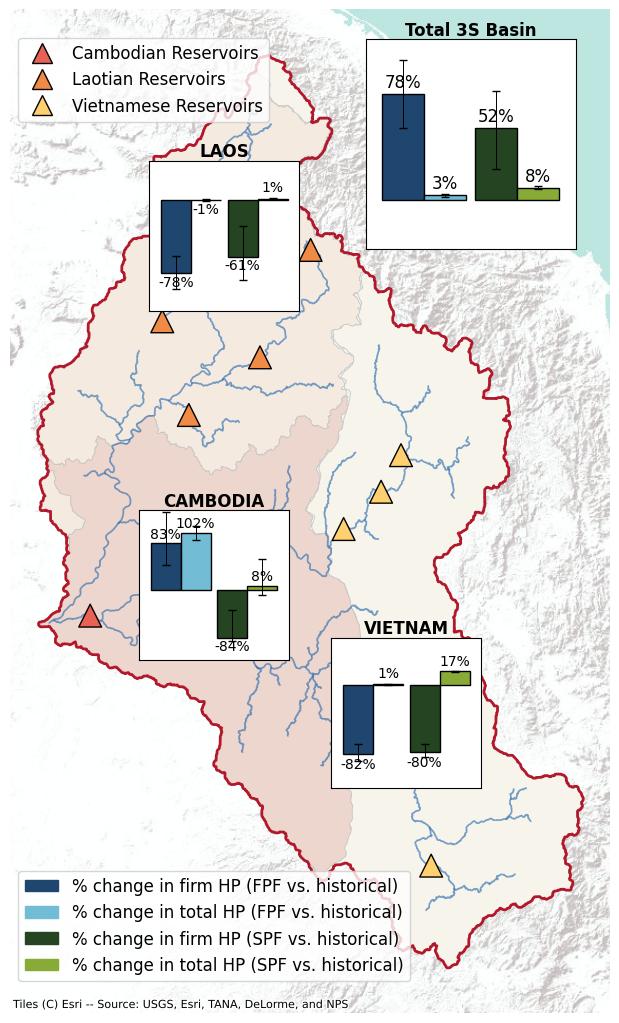

In [87]:

# Identify storagecapacity of the 9 optimized reservoir
selected_reservoirs = ['NamKong3', 'XepianXenam', 'Xekaman3', 'Xekaman1', 'Pleikrong', 'YaLi', 'Sesan4', 'LowerSesan2', 'BuonTuaSrah']

# Filter the selected reservoirs and calculate the percentages
selected_reservoirs_data = reservoirs[reservoirs['name'].isin(selected_reservoirs)]
total_storage = reservoirs['storagecap'].sum()
percentages = selected_reservoirs_data['storagecap'] / total_storage * 100

# Calculate the sum of the other reservoirs
other_storage = reservoirs[~reservoirs['name'].isin(selected_reservoirs)]['storagecap'].sum()
percentages = percentages.tolist() + [other_storage / total_storage * 100]
labels = selected_reservoirs_data['name'].tolist() + ['All the other']


cmap2 = load_cmap("BuRd")

fig = plt.figure(figsize=(6, 20))
left = 0
bottom = 1
width = 1
height = 1

ax2 = fig.add_axes([left, bottom, width, height])
#ax2 = plt.subplot(222)
ax2.axis('off')
cmap1 = load_cmap("Hiroshige")
cmap4 = load_cmap("Geyser")
#cmap1 = interpolate_cmap(cmap1, 1000)
#basin.plot(ax=ax2, facecolor=cmap1(0.51), edgecolor=cmap1(0.95))
kh_3s.plot(ax=ax2, facecolor=cmap4(0.9, alpha=1),edgecolor='black',linewidth=0.6,label='Cambodia')
la_3s.plot(ax=ax2, facecolor=cmap4(0.6, alpha=1),edgecolor='black',linewidth=0.6, label='Laos')
vn_3s.plot(ax=ax2, facecolor=cmap4(0.5,alpha=1),edgecolor='black',linewidth=0.6,label='Vietnam')
#kh_3s.plot(ax=ax2,facecolor="none", edgecolor=cmap2(0.1, alpha=0.8),label='Cambodia')
#la_3s.plot(ax=ax2,facecolor="none", edgecolor=cmap2(0.01,alpha=0.9),linewidth=0.4 , label='Laos')
#vn_3s.plot(ax=ax2,facecolor="none", edgecolor=cmap2(0.2,alpha=0.6),label='Vietnam')
basin.plot(ax=ax2, facecolor=cmap2(0.51, alpha=0.8), edgecolor=cmap2(0.95),linewidth=2)
#srepok.plot(ax=ax, facecolor="none", edgecolor="green", label='Srepok Sub-basin')
#sesan.plot(ax=ax, facecolor="none", edgecolor="orange", label='Sesan Sub-basin')
#sekong.plot(ax=ax, facecolor="none", edgecolor="purple", label='Sekong Sub-basin')
rivernetwork.plot(ax=ax2, color=cmap2(0.015,alpha=0.6),linewidth=1.2,zorder=1)
# For the bubble plot, use the 'markersize' parameter with the 'storagecapacity' column
# Plot with the reservoirs as triangles (top right)

cambodian_reservoirs = ['LowerSesan2']
laotian_reservoirs = ['NamKong3', 'XepianXenam', 'Xekaman3','Xekaman1']
vietnamese_reservoirs = ['Pleikrong', 'YaLi', 'Sesan4', 'BuonTuaSrah']

# Assigning colors to each country
group_colors = {
    'cambodian': cmap1(0.01),  
    'laotian': cmap1(0.1),    
    'vietnamese': cmap1(0.3)  
}


color_map = {}
for reservoir in selected_reservoirs_data['name']:
    if reservoir in cambodian_reservoirs:
        color_map[reservoir] = group_colors['cambodian']
    elif reservoir in laotian_reservoirs:
        color_map[reservoir] = group_colors['laotian']
    elif reservoir in vietnamese_reservoirs:
        color_map[reservoir] = group_colors['vietnamese']

# Creation of the color list for the scatter plot
scatter_colors = [color_map[res] for res in selected_reservoirs_data['name']]


ax2.scatter(
    selected_reservoirs_data.geometry.x, 
    selected_reservoirs_data.geometry.y, 
    marker='^', 
    s=270, 
    c=scatter_colors,
    edgecolors='black', 
    label='Reservoirs'
)
#Adding a custom legend in the bottom left
legend_elements = [
    Line2D([0], [0], marker='^', color='w', markerfacecolor=group_colors['cambodian'],markeredgecolor='black', markersize=10, label='Cambodian Reservoirs'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor=group_colors['laotian'],markeredgecolor='black', markersize=10, label='Laotian Reservoirs'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor=group_colors['vietnamese'],markeredgecolor='black', markersize=10, label='Vietnamese Reservoirs')
]

legend1 = ax2.legend(
    handles=legend_elements, 
    loc='upper left', 
    markerscale=1.5, 
    fontsize=12,
    bbox_to_anchor=(0, 0.98)  # Spostamento della legenda più in alto
)


ax2.add_artist(legend1) 
#ax2.legend(loc='lower left', markerscale=2)  
'''
colors = cmap1(np.linspace(0, 1, len(selected_reservoirs)))
color_map = dict(zip(selected_reservoirs_data['name'], colors))

scatter_colors = [color_map[res] for res in selected_reservoirs_data['name']]

# scatter plot
ax2.scatter(selected_reservoirs_data.geometry.x, selected_reservoirs_data.geometry.y, marker='^', s=270, c=scatter_colors,edgecolors='black', label='Reservoirs')
'''


ax2.axis('off')
# Geographic positions for the bar plots
#Calculate the centroids of the polygons for each state
centroid_cambodia = kh_3s.geometry.centroid
centroid_laos = la_3s.geometry.centroid
centroid_vietnam = vn_3s.geometry.centroid
centroid_3S = basin.geometry.centroid


Cambodia_x = centroid_cambodia.x.mean()-6000
Cambodia_y = centroid_cambodia.y.mean()+14000
Laos_x = centroid_laos.x.mean()+6000
Laos_y = centroid_laos.y.mean()+43000
Vietnam_x = centroid_vietnam.x.mean()-10000
Vietnam_y = centroid_vietnam.y.mean()-45000
Total_x = centroid_3S.x.mean()+100000
Total_y = centroid_3S.y.mean()+225000  

cmap5 = load_cmap("Alkalay2")
cmap3 = load_cmap("Hiroshige")
# Barplot data
bar_data = {
    "Cambodia": [hydrofirm_cambodia_diff_median_flush, totalproduction_cambodia_diff_median_flush, hydrofirm_cambodia_diff_median, totalproduction_cambodia_diff_median],
    "Laos": [hydrofirm_laos_diff_median_flush, totalproduction_laos_diff_median_flush,hydrofirm_laos_diff_median, totalproduction_laos_diff_median],
    "Vietnam": [hydrofirm_vietnam_diff_median_flush, totalproduction_vietnam_diff_median_flush,hydrofirm_vietnam_diff_median, totalproduction_vietnam_diff_median],
    "Total": [hydrofirm_diff_median_flush, totalproduction_diff_median_flush,hydrofirm_diff_median, totalproduction_diff_median],
}
label = ['Firm HP','Total annual HP production']
# bar colors
bar_colors = [cmap3(0.9), cmap3(0.6), cmap5(0.8), cmap5(0.3)]  # Rosso e blu, per Hydrofirm e TotalProduction
bar_labels = ['% change in firm HP (FPF vs. historical)', '% change in total HP (FPF vs. historical)','% change in firm HP (SPF vs. historical)', '% change in total HP (SPF vs. historical)']




bar_widths = [0.9, 0.9, 0.9, 0.9]  
bar_positions = [0.1, 1, 2.1, 3]  

inset_ax = inset_axes(ax2, width=1.5, height=1.5, loc='center', bbox_to_anchor=(Cambodia_x, Cambodia_y, 1, 1),
                        bbox_transform=ax2.transData, borderpad=2)
#bars=inset_ax.bar(bar_labels, bar_data['Cambodia'], color=bar_colors, edgecolor="black", width=1)
bars = inset_ax.bar(bar_positions, bar_data['Cambodia'], color=bar_colors, edgecolor="black", width=bar_widths)
inset_ax.set_xticks([])  # Rimuovi le etichette sugli assi
inset_ax.set_yticks([])

for i, bar in enumerate(bars):
    bar_center = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    # Format the value as a percentage
    value = f"{round(height)}%"
    # Calculate the error based on the percentiles
    yerr_lower_firm_flush = height - hydrofirm_cambodia_diff_perc75_flush
    yerr_upper_firm_flush = hydrofirm_cambodia_diff_perc25_flush - height
    yerr_lower_hydro_flush = height - totalproduction_cambodia_diff_perc75_flush
    yerr_upper_hydro_flush = totalproduction_cambodia_diff_perc25_flush - height

    yerr_lower_firm = height - hydrofirm_cambodia_diff_perc75
    yerr_upper_firm = hydrofirm_cambodia_diff_perc25 - height
    yerr_lower_hydro = height - totalproduction_cambodia_diff_perc75
    yerr_upper_hydro = totalproduction_cambodia_diff_perc25 - height
    # Add vertical errors (whiskers)
    if i == 0:
        
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_firm_flush], [yerr_upper_firm_flush]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==1:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_hydro_flush], [yerr_upper_hydro_flush]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==2:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_firm], [yerr_upper_firm]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==3:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_hydro], [yerr_upper_hydro]], fmt='none', color='black', capsize=3, linewidth=0.7)
    if height >= 0:  
        inset_ax.text(bar.get_x() + bar.get_width() / 2, height + 4, value, ha='center', va='bottom', fontsize=10, color='black')
    else:  
        inset_ax.text(bar.get_x() + bar.get_width() / 2, height - 4, value, ha='center', va='top', fontsize=10, color='black')
inset_ax.set_aspect('auto', adjustable='box')

inset_ax.set_xlim(-0.7, 3.8)

inset_ax.set_ylim(min(bar_data['Cambodia']) - 40, max(bar_data['Cambodia']) + 40)

inset_ax.text(
    0.5, 1,  
    "CAMBODIA",  
    fontsize=12,  
    fontweight="bold", 
    ha="center",  
    va="bottom",  
    transform=inset_ax.transAxes  
)


# Repeating everything for Laotian Barplot


inset_ax = inset_axes(ax2, width=1.5, height=1.5, loc='center', bbox_to_anchor=(Laos_x, Laos_y, 1, 1),
                        bbox_transform=ax2.transData, borderpad=0.5)
bars = inset_ax.bar(bar_positions, bar_data['Laos'], color=bar_colors, edgecolor="black", width=bar_widths)
inset_ax.set_xticks([])  
inset_ax.set_yticks([])
#inset_ax.set_facecolor(cmap3(0.4))
#    inset_ax.set_title(region, fontsize=8, pad=2) 
for i, bar in enumerate(bars):
    bar_center = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    
    value = f"{round(height)}%"
    
    yerr_lower_firm_flush = height - hydrofirm_laos_diff_perc75_flush
    yerr_upper_firm_flush = hydrofirm_laos_diff_perc25_flush - height
    yerr_lower_hydro_flush = height - totalproduction_laos_diff_perc75_flush
    yerr_upper_hydro_flush = totalproduction_laos_diff_perc25_flush - height

    yerr_lower_firm = height - hydrofirm_laos_diff_perc75
    yerr_upper_firm = hydrofirm_laos_diff_perc25 - height
    yerr_lower_hydro = height - totalproduction_laos_diff_perc75
    yerr_upper_hydro = totalproduction_laos_diff_perc25 - height
    
    if i == 0:
        
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_firm_flush], [yerr_upper_firm_flush]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==1:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_hydro_flush], [yerr_upper_hydro_flush]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==2:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_firm], [yerr_upper_firm]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==3:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_hydro], [yerr_upper_hydro]], fmt='none', color='black', capsize=3, linewidth=0.7)
    if height >= 0:  
        inset_ax.text(bar.get_x() + bar.get_width() / 2, height + 4, value, ha='center', va='bottom', fontsize=10, color='black')
    else:  
        inset_ax.text(bar.get_x() + bar.get_width() / 2, height - 2, value, ha='center', va='top', fontsize=10, color='black')
inset_ax.set_aspect('auto', adjustable='box')
inset_ax.set_xlim(-0.7, 3.8)

inset_ax.set_ylim(min(bar_data['Laos']) - 40, max(bar_data['Laos']) + 40)

inset_ax.text(
    0.5, 1, 
    "LAOS",  
    fontsize=12,  
    fontweight="bold", 
    ha="center", 
    va="bottom",  
    transform=inset_ax.transAxes  
)


# Repeating everything for Vietnamese Bar Plot


inset_ax = inset_axes(ax2, width=1.5, height=1.5, loc='center', bbox_to_anchor=(Vietnam_x, Vietnam_y, 1, 1),
                        bbox_transform=ax2.transData, borderpad=0.5)
#bars=inset_ax.bar(bar_labels, bar_data['Vietnam'], color=bar_colors, edgecolor="black", width=1)
bars = inset_ax.bar(bar_positions, bar_data['Vietnam'], color=bar_colors, edgecolor="black", width=bar_widths)
inset_ax.set_xticks([])  
inset_ax.set_yticks([])

#inset_ax.set_facecolor(cmap3(0.3))
#    inset_ax.set_title(region, fontsize=8, pad=2) 
for i, bar in enumerate(bars):
    bar_center = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    
    value = f"{round(height)}%"
    
    yerr_lower_firm_flush = height - hydrofirm_vietnam_diff_perc75_flush
    yerr_upper_firm_flush = hydrofirm_vietnam_diff_perc25_flush - height
    yerr_lower_hydro_flush = height - totalproduction_vietnam_diff_perc75_flush
    yerr_upper_hydro_flush = totalproduction_vietnam_diff_perc25_flush - height

    yerr_lower_firm = height - hydrofirm_vietnam_diff_perc75
    yerr_upper_firm = hydrofirm_vietnam_diff_perc25 - height
    yerr_lower_hydro = height - totalproduction_vietnam_diff_perc75
    yerr_upper_hydro = totalproduction_vietnam_diff_perc25 - height
    
    if i == 0:
        
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_firm_flush], [yerr_upper_firm_flush]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==1:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_hydro_flush], [yerr_upper_hydro_flush]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==2:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_firm], [yerr_upper_firm]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==3:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_hydro], [yerr_upper_hydro]], fmt='none', color='black', capsize=3, linewidth=0.7)
    if height >= 0:  
        inset_ax.text(bar.get_x() + bar.get_width() / 2, height + 4, value, ha='center', va='bottom', fontsize=10, color='black')
    else:  
        inset_ax.text(bar.get_x() + bar.get_width() / 2, height - 4, value, ha='center', va='top', fontsize=10, color='black')
inset_ax.set_aspect('auto', adjustable='box')
inset_ax.set_xlim(-0.7, 3.8)

inset_ax.set_ylim(min(bar_data['Vietnam']) - 40, max(bar_data['Vietnam']) + 40)

inset_ax.text(
    0.5, 1,  
    "VIETNAM",  
    fontsize=12,  
    fontweight="bold",  
    ha="center", 
    va="bottom",  
    transform=inset_ax.transAxes  
)

# Last plot with overall performances

inset_ax = inset_axes(ax2, width=2.1, height=2.1, loc='center', bbox_to_anchor=(Total_x, Total_y, 1, 1),
                        bbox_transform=ax2.transData, borderpad=0.5)
#bars=inset_ax.bar(bar_labels, bar_data['Total'], color=bar_colors, edgecolor="black", width=1)
bars = inset_ax.bar(bar_positions, bar_data['Total'], color=bar_colors, edgecolor="black", width=bar_widths)
inset_ax.set_xticks([]) 
inset_ax.set_yticks([])
#inset_ax.set_facecolor(cmap3(0.5))
#    inset_ax.set_title(region, fontsize=8, pad=2) 
for i, bar in enumerate(bars):
    bar_center = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    
    value = f"{round(height)}%"
    
    yerr_lower_firm_flush = height - hydrofirm_diff_perc75_flush
    yerr_upper_firm_flush = hydrofirm_diff_perc25_flush - height
    yerr_lower_hydro_flush = height - totalproduction_diff_perc75_flush
    yerr_upper_hydro_flush = totalproduction_diff_perc25_flush - height

    yerr_lower_firm = height - hydrofirm_diff_perc75
    yerr_upper_firm = hydrofirm_diff_perc25 - height
    yerr_lower_hydro = height - totalproduction_diff_perc75
    yerr_upper_hydro = totalproduction_diff_perc25 - height
    
    if i == 0:
        
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_firm_flush], [yerr_upper_firm_flush]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==1:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_hydro_flush], [yerr_upper_hydro_flush]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==2:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_firm], [yerr_upper_firm]], fmt='none', color='black', capsize=3, linewidth=0.7)
    elif i==3:
        inset_ax.errorbar(bar_center, height, yerr=[[yerr_lower_hydro], [yerr_upper_hydro]], fmt='none', color='black', capsize=3, linewidth=0.7)
    if height >= 0:  
        inset_ax.text(bar.get_x() + bar.get_width() / 2, height + 2, value, ha='center', va='bottom', fontsize=12, color='black')
    else: 
        inset_ax.text(bar.get_x() + bar.get_width() / 2, height - 2, value, ha='center', va='top', fontsize=12, color='black')
inset_ax.set_aspect('auto', adjustable='box')
inset_ax.set_xlim(-0.7, 3.8)

inset_ax.set_ylim(min(bar_data['Total']) - 40, max(bar_data['Total']) + 40)

inset_ax.text(
    0.5, 1,  
    "Total 3S Basin",  
    fontsize=12, 
    fontweight="bold", 
    ha="center",  
    va="bottom",  
    transform=inset_ax.transAxes 
)
# Create the handles for the legend
legend_patches = [mpatches.Patch(color=bar_colors[i], label=bar_labels[i]) for i in range(len(bar_labels))]

# Add the legend to the main plot (ax2)
ax2.legend(handles=legend_patches, loc='upper left', fontsize=12, bbox_to_anchor=(0.0, 0.15))
providers = ctx.providers.flatten()
ctx.add_basemap(ax2, crs=reservoirs.crs.to_string(), source=ctx.providers.Esri.WorldTerrain)

#ctx.add_basemap(ax2, crs=reservoirs.crs.to_string(), source=ctx.providers.Stamen.Terrain)
#ctx.add_basemap(ax2, crs=reservoirs.crs.to_string(), source=providers['NASAGIBS.ASTER_GDEM_Greyscale_Shaded_Relief'])

fig.savefig('Figure6.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plt.tight_layout()
plt.show()
